https://www.kaggle.com/carlosaguayo/deep-learning-for-text-classification

In [1]:
import pickle
import os
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling1D

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

In [2]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)

In [3]:
df = all_articles
df.head()

,source,title,article,category,length_characters,length_words,category_code
0,The Straits Times,"Myth, magic and memoirs at storytelling festival",singapore complicate life story mexican pain...,Lifestyle,3603,589,3
1,AsiaOne,Beyond the ski slopes: Why the wealthy have ey...,hot sunny day im look hokkaidos mighty usu vol...,Lifestyle,9642,1500,3
2,The Straits Times,Critics gush over the spectacle and story of A...,los angeles unite state reuters film critics...,Lifestyle,2390,374,3
3,AsiaOne,Spaces we love: Singaporean homes washed in na...,want home bath light adjustments need make get...,Lifestyle,1645,286,3
4,Channel News Asia,NaN,amid colossal portraits clean line black white...,Lifestyle,1985,300,3


In [4]:
df['category'].unique()

array(['Lifestyle', 'World', 'Technology', 'Business', 'Singapore',
       'Sports'], dtype=object)

In [5]:
len(df)

6000

# GloVe embeddings

In [6]:
texts = df['article'] #Extract text
target = df['category'] # Extract target

In [7]:
texts.head()

0     singapore  complicate life story mexican pain...
1    hot sunny day im look hokkaidos mighty usu vol...
2     los angeles unite state reuters  film critics...
3    want home bath light adjustments need make get...
4    amid colossal portraits clean line black white...
Name: article, dtype: object

In [8]:
target.head()

0    Lifestyle
1    Lifestyle
2    Lifestyle
3    Lifestyle
4    Lifestyle
Name: category, dtype: object

In [9]:
vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size) # Setup tokenizer
tokenizer.fit_on_texts(df['article'])
sequences = tokenizer.texts_to_sequences(df['article']) # Generate sequences

In [10]:
print (tokenizer.texts_to_sequences(['how are you?']))

[[]]


In [11]:
print (sequences[0])

[4, 3230, 205, 87, 4867, 11724, 19508, 14373, 2811, 17326, 1385, 213, 1917, 820, 10518, 961, 484, 2259, 6378, 643, 6072, 961, 116, 1797, 183, 281, 760, 20, 653, 916, 431, 17327, 903, 10519, 5942, 3579, 1225, 2487, 17327, 11725, 4434, 307, 6860, 369, 205, 307, 5814, 1123, 212, 13318, 1320, 38, 860, 37, 1002, 14373, 1970, 975, 288, 37, 22, 2215, 385, 101, 14373, 158, 177, 1698, 3231, 366, 288, 37, 1455, 19508, 14373, 61, 105, 661, 591, 508, 1622, 1395, 10015, 1, 1007, 594, 6536, 1787, 2036, 1, 2025, 215, 285, 15, 10, 1088, 1008, 760, 3004, 1208, 3764, 20, 398, 343, 3, 3333, 2928, 9186, 2929, 1508, 1, 6537, 48, 3579, 381, 1508, 885, 2290, 35, 45, 240, 371, 8, 837, 23, 5943, 2, 53, 12457, 2893, 32, 68, 917, 369, 48, 137, 7, 304, 435, 82, 7274, 44, 8, 1093, 658, 506, 977, 1703, 115, 6379, 9187, 1061, 672, 961, 20, 347, 694, 9187, 367, 17328, 315, 1124, 132, 168, 276, 275, 847, 20, 330, 87, 8870, 1311, 1204, 106, 3050, 442, 192, 3985, 3189, 6216, 476, 233, 4, 1811, 10016, 2143, 2930, 4145, 9

In [12]:
word_index = tokenizer.word_index
print('Found {:,} unique words.'.format(len(word_index)))

Found 65,992 unique words.


In [13]:
# Create inverse index mapping numbers to words
inv_index = {v: k for k, v in tokenizer.word_index.items()}

# Print out text again
for w in sequences[0]:
    x = inv_index.get(w)
    print(x,end = ' ')

singapore complicate life story mexican painter frida kahlo exhibition effigies female third edition annual storytelling festival aim disrupt notion single narrative festival run arts house june program include asian premier american storyteller david rendition ancient epic reflect brazilian storyteller ana maria line weave stories life line fascinate ability turn adversity art since child show picture kahlo paint class create show go mexico visit place kahlo live talk artists locals process create show inspire frida kahlo help another understand death important remember celebrate ancestors say email message festivals creative producer say audience grow begin last year attend ticket program observe increasingly audiences include parent children also professionals keen hone communication skills say somebody tell epic minutes skills apply pitch market find spend lot time wait people dictate us see visualise imagine add want type stories tell allow make believe access part imagination giv

In [14]:
# Get the average length of a text
avg = sum(map(len, sequences)) / len(sequences)

# Get the standard deviation of the sequence length
std = np.sqrt(sum(map(lambda x: (len(x) - avg)**2, sequences)) / len(sequences))

avg,std

(244.54333333333332, 166.86667469037144)

In [15]:
print(pad_sequences([[1,2,3]], maxlen=5))
print(pad_sequences([[1,2,3,4,5,6]], maxlen=5))

[[0 0 1 2 3]]
[[2 3 4 5 6]]


In [16]:
max_length = 100
data = pad_sequences(sequences, maxlen=max_length)

In [17]:
from keras.utils import to_categorical
labels = to_categorical(np.asarray(df['category_code']))
print('Shape of data:', data.shape)
print('Shape of labels:', labels.shape)

print (df['category_code'][0])
print (labels[0])

Shape of data: (6000, 100)
Shape of labels: (6000, 7)
3
[0. 0. 0. 1. 0. 0. 0.]


Using TensorFlow backend.


In [18]:
glove_dir = './Glove' # This is the folder with the dataset

embeddings_index = {} # We create a dictionary of word -> embedding

with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0] # The first value is the word, the rest are the values of the embedding
        embedding = np.asarray(values[1:], dtype='float32') # Load embedding
        embeddings_index[word] = embedding # Add embedding to our embedding dictionary

print('Found {:,} word vectors in GloVe.'.format(len(embeddings_index)))

Found 400,000 word vectors in GloVe.


In [19]:
print (embeddings_index['frog'])
print (len(embeddings_index['frog']))

[ 0.043084   0.53233    0.54254   -0.076952  -0.29673    0.52986
  0.21379    0.15789   -0.3952    -0.91889   -0.6585     0.68706
  0.10821   -0.10694   -0.3401     1.044      0.12775    0.51157
  0.60314    0.71366   -0.5374     0.37737    0.12186    0.60891
  0.50107    2.0215    -0.47318    0.46953    0.12542    0.60207
  0.11007    0.37587    1.0137    -0.2478     0.65748    0.12801
 -0.57647   -0.25754    0.62426    0.010864  -0.40681    0.16173
 -0.84695   -0.24603    0.29078    0.8546    -0.067021   0.69331
 -0.71545   -0.25184   -0.74741   -0.26507    0.4873     0.41991
 -0.86741   -0.5235    -0.44774   -0.044584   0.033836   0.29909
  0.73754    0.81651    0.69431    0.80453    0.29276   -0.025244
 -0.30453   -0.34329    0.11933   -0.29655    0.1072    -0.18946
  0.18501   -0.7548    -0.25628    0.34438   -0.016743   0.0040503
  0.39342    0.99404   -0.32159   -0.49434    0.41708   -0.011019
 -0.16613   -0.20839    0.28152   -0.82996    0.79839    0.61645
  0.31537   -0.27629 

In [20]:
print (np.linalg.norm(embeddings_index['man'] - embeddings_index['woman']))
print (np.linalg.norm(embeddings_index['man'] - embeddings_index['cat']))

# https://nlp.stanford.edu/projects/glove/
print (np.linalg.norm(embeddings_index['frog'] - embeddings_index['toad']))
print (np.linalg.norm(embeddings_index['frog'] - embeddings_index['man']))

print (np.linalg.norm(embeddings_index['frog'] - embeddings_index['fog']))

print (np.linalg.norm(embeddings_index['frog'] - embeddings_index['fork']))
print (np.linalg.norm(embeddings_index['frog'] - embeddings_index['skyscraper']))

3.364068
5.197995
4.1249743
6.794355
7.311559
6.5261207
7.450874


In [21]:
embedding_dim = 100 # We use 100 dimensional glove vectors

word_index = tokenizer.word_index
nb_words = min(vocab_size, len(word_index)) # How many words are there actually

embedding_matrix = np.zeros((nb_words, embedding_dim))

# The vectors need to be in the same position as their index. 
# Meaning a word with token 1 needs to be in the second row (rows start with zero) and so on

# Loop over all words in the word index
for word, i in word_index.items():
    # If we are above the amount of words we want to use we do nothing
    if i >= vocab_size: 
        continue
    # Get the embedding vector for the word
    embedding_vector = embeddings_index.get(word)
    # If there is an embedding vector, put it in the embedding matrix
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

In [22]:
print (embedding_matrix[100])

[ 3.44169997e-02 -7.82779977e-02 -2.69580007e-01 -2.81430006e-01
 -4.50519994e-02 -7.56359994e-01 -1.23109996e-01 -1.15690000e-01
  2.18899995e-01 -2.21110005e-02  2.33830005e-01 -4.70330000e-01
  5.46620011e-01 -1.41939998e-01 -5.79029977e-01 -3.28819990e-01
  4.39529985e-01 -3.45509984e-02  5.36479987e-02  2.45269999e-01
 -1.87130004e-01  5.14840007e-01  3.49200010e-01 -2.11070001e-01
 -2.76659995e-01 -2.20459998e-01  3.01820010e-01 -3.45099986e-01
 -6.26320004e-01 -6.41919971e-02 -2.94559985e-01  1.27149999e+00
 -8.71800035e-02 -9.83359993e-01 -5.45090020e-01  6.23600006e-01
 -2.04889998e-01  5.89120016e-03 -1.81439996e-01 -4.35829997e-01
 -6.64070025e-02 -1.01530004e+00 -2.64450014e-01 -1.88119993e-01
 -4.02749985e-01 -3.83049995e-01  5.82799986e-02 -4.92610000e-02
  2.80600011e-01 -6.15300000e-01 -2.86119998e-01  8.50169978e-04
 -2.92280000e-02  7.64869988e-01  3.09940010e-01 -2.25909996e+00
 -2.05290005e-01 -1.96730003e-01  2.43309999e+00  3.63420010e-01
 -2.05809996e-01  1.88630

In [23]:
def createModel():
    model = Sequential()
    model.add(layers.Embedding(vocab_size, 
                        embedding_dim, 
                        input_length=max_length, 
                        weights = [embedding_matrix], 
                        trainable = True))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])    
    return model

In [24]:
# Setup the models
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 98, 128)           38528     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 32, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 128)            49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 128)            0

In [25]:
modelname   = 'deeplearning_glove'
filepath        = './Models/'+modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_acc', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

                            # Log the epoch detail into csv
csv_logger      = CSVLogger('./Models/'+modelname +'.csv')
callbacks_list  = [checkpoint,csv_logger]


In [26]:
trDat, tsDat, trLbl, tsLbl = train_test_split(data, labels, test_size=0.33, random_state=42)

In [34]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',  # https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
#               metrics=['accuracy'])

# https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.fit(data, labels, validation_split=0.2, epochs=10)


model.fit(trDat, 
          trLbl, 
          validation_data=(tsDat, tsLbl), 
          epochs=100, 
          batch_size=128,
          shuffle=True,
          callbacks=callbacks_list)


Train on 4020 samples, validate on 1980 samples
Epoch 1/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0722 - accuracy: 0.9779

W0916 21:41:14.899619 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 562us/sample - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.2359 - val_accuracy: 0.9214
Epoch 2/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9923

W0916 21:41:16.388123 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0225 - accuracy: 0.9922 - val_loss: 0.2681 - val_accuracy: 0.9198
Epoch 3/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9925

W0916 21:41:17.874656 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0194 - accuracy: 0.9925 - val_loss: 0.2651 - val_accuracy: 0.9234
Epoch 4/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0202 - accuracy: 0.9933

W0916 21:41:19.359688 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 369us/sample - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.2630 - val_accuracy: 0.9236
Epoch 5/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9940

W0916 21:41:20.841236 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 368us/sample - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.2714 - val_accuracy: 0.9206
Epoch 6/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9934

W0916 21:41:22.361174 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 378us/sample - loss: 0.0188 - accuracy: 0.9931 - val_loss: 0.2813 - val_accuracy: 0.9219
Epoch 7/100
3840/4020 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9933

W0916 21:41:23.915187 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 386us/sample - loss: 0.0190 - accuracy: 0.9931 - val_loss: 0.2642 - val_accuracy: 0.9232
Epoch 8/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9927

W0916 21:41:25.446514 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 381us/sample - loss: 0.0193 - accuracy: 0.9926 - val_loss: 0.2763 - val_accuracy: 0.9176
Epoch 9/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9933

W0916 21:41:26.988404 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 383us/sample - loss: 0.0186 - accuracy: 0.9932 - val_loss: 0.2620 - val_accuracy: 0.9258
Epoch 10/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9929

W0916 21:41:28.485559 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 372us/sample - loss: 0.0186 - accuracy: 0.9929 - val_loss: 0.2960 - val_accuracy: 0.9181
Epoch 11/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9937

W0916 21:41:29.995033 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 375us/sample - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.2960 - val_accuracy: 0.9167
Epoch 12/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9939

W0916 21:41:31.527449 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 381us/sample - loss: 0.0173 - accuracy: 0.9938 - val_loss: 0.2817 - val_accuracy: 0.9222
Epoch 13/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0178 - accuracy: 0.9930

W0916 21:41:33.082764 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 387us/sample - loss: 0.0181 - accuracy: 0.9929 - val_loss: 0.2855 - val_accuracy: 0.9218
Epoch 14/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9938

W0916 21:41:34.603016 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 378us/sample - loss: 0.0168 - accuracy: 0.9936 - val_loss: 0.2837 - val_accuracy: 0.9243
Epoch 15/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9934

W0916 21:41:36.119568 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 377us/sample - loss: 0.0167 - accuracy: 0.9932 - val_loss: 0.2907 - val_accuracy: 0.9200
Epoch 16/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9936

W0916 21:41:37.629332 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 375us/sample - loss: 0.0162 - accuracy: 0.9936 - val_loss: 0.3163 - val_accuracy: 0.9154
Epoch 17/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9934

W0916 21:41:39.144245 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 377us/sample - loss: 0.0160 - accuracy: 0.9934 - val_loss: 0.3162 - val_accuracy: 0.9211
Epoch 18/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9930

W0916 21:41:40.660839 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 377us/sample - loss: 0.0158 - accuracy: 0.9929 - val_loss: 0.2816 - val_accuracy: 0.9211
Epoch 19/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9931

W0916 21:41:42.174762 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 376us/sample - loss: 0.0153 - accuracy: 0.9930 - val_loss: 0.2999 - val_accuracy: 0.9226
Epoch 20/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9931

W0916 21:41:43.694705 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 378us/sample - loss: 0.0151 - accuracy: 0.9931 - val_loss: 0.3009 - val_accuracy: 0.9186
Epoch 21/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9931

W0916 21:41:45.191948 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 372us/sample - loss: 0.0149 - accuracy: 0.9930 - val_loss: 0.3347 - val_accuracy: 0.9146
Epoch 22/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9932

W0916 21:41:46.716248 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 379us/sample - loss: 0.0167 - accuracy: 0.9932 - val_loss: 0.2829 - val_accuracy: 0.9251
Epoch 23/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9929

W0916 21:41:48.243349 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 380us/sample - loss: 0.0144 - accuracy: 0.9928 - val_loss: 0.3115 - val_accuracy: 0.9211
Epoch 24/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9934

W0916 21:41:49.762295 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 378us/sample - loss: 0.0139 - accuracy: 0.9934 - val_loss: 0.3083 - val_accuracy: 0.9236
Epoch 25/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9926

W0916 21:41:51.279430 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 377us/sample - loss: 0.0137 - accuracy: 0.9927 - val_loss: 0.2905 - val_accuracy: 0.9223
Epoch 26/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9935

W0916 21:41:52.836674 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 387us/sample - loss: 0.0124 - accuracy: 0.9935 - val_loss: 0.3188 - val_accuracy: 0.9188
Epoch 27/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9933

W0916 21:41:54.379893 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 384us/sample - loss: 0.0129 - accuracy: 0.9932 - val_loss: 0.2947 - val_accuracy: 0.9222
Epoch 28/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9934

W0916 21:41:55.890241 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 375us/sample - loss: 0.0133 - accuracy: 0.9930 - val_loss: 0.3291 - val_accuracy: 0.9223
Epoch 29/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0136 - accuracy: 0.9927

W0916 21:41:57.415039 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 379us/sample - loss: 0.0137 - accuracy: 0.9928 - val_loss: 0.2864 - val_accuracy: 0.9242
Epoch 30/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9931

W0916 21:41:58.964896 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 385us/sample - loss: 0.0127 - accuracy: 0.9931 - val_loss: 0.3206 - val_accuracy: 0.9268
Epoch 31/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9934

W0916 21:42:00.481907 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 377us/sample - loss: 0.0128 - accuracy: 0.9933 - val_loss: 0.3007 - val_accuracy: 0.9238
Epoch 32/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9932

W0916 21:42:02.048246 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 389us/sample - loss: 0.0116 - accuracy: 0.9933 - val_loss: 0.3272 - val_accuracy: 0.9200
Epoch 33/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9936

W0916 21:42:03.614567 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 389us/sample - loss: 0.0120 - accuracy: 0.9935 - val_loss: 0.3251 - val_accuracy: 0.9185
Epoch 34/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9925

W0916 21:42:05.154959 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 383us/sample - loss: 0.0120 - accuracy: 0.9926 - val_loss: 0.3063 - val_accuracy: 0.9254
Epoch 35/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9925

W0916 21:42:06.669909 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 377us/sample - loss: 0.0119 - accuracy: 0.9925 - val_loss: 0.3070 - val_accuracy: 0.9206
Epoch 36/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9932

W0916 21:42:08.180861 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 376us/sample - loss: 0.0121 - accuracy: 0.9932 - val_loss: 0.3191 - val_accuracy: 0.9162
Epoch 37/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9931

W0916 21:42:09.696719 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 377us/sample - loss: 0.0109 - accuracy: 0.9931 - val_loss: 0.3221 - val_accuracy: 0.9231
Epoch 38/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9937

W0916 21:42:11.222656 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 379us/sample - loss: 0.0108 - accuracy: 0.9937 - val_loss: 0.3186 - val_accuracy: 0.9249
Epoch 39/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0115 - accuracy: 0.9930

W0916 21:42:12.758552 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 382us/sample - loss: 0.0114 - accuracy: 0.9931 - val_loss: 0.3042 - val_accuracy: 0.9230
Epoch 40/100
3840/4020 [===========================>..] - ETA: 0s - loss: 0.0107 - accuracy: 0.9934

W0916 21:42:14.312765 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 386us/sample - loss: 0.0107 - accuracy: 0.9933 - val_loss: 0.3526 - val_accuracy: 0.9240
Epoch 41/100
3840/4020 [===========================>..] - ETA: 0s - loss: 0.0114 - accuracy: 0.9923

W0916 21:42:15.859647 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 385us/sample - loss: 0.0114 - accuracy: 0.9923 - val_loss: 0.3057 - val_accuracy: 0.9253
Epoch 42/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9937

W0916 21:42:17.416533 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 387us/sample - loss: 0.0105 - accuracy: 0.9937 - val_loss: 0.3241 - val_accuracy: 0.9190
Epoch 43/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9928

W0916 21:42:18.935581 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 378us/sample - loss: 0.0103 - accuracy: 0.9929 - val_loss: 0.3373 - val_accuracy: 0.9215
Epoch 44/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9932

W0916 21:42:20.449206 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 376us/sample - loss: 0.0105 - accuracy: 0.9931 - val_loss: 0.3265 - val_accuracy: 0.9227
Epoch 45/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9932

W0916 21:42:21.969550 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 378us/sample - loss: 0.0108 - accuracy: 0.9932 - val_loss: 0.3047 - val_accuracy: 0.9249
Epoch 46/100
3840/4020 [===========================>..] - ETA: 0s - loss: 0.0104 - accuracy: 0.9933

W0916 21:42:23.579034 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 400us/sample - loss: 0.0103 - accuracy: 0.9933 - val_loss: 0.3477 - val_accuracy: 0.9219
Epoch 47/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9934

W0916 21:42:25.168785 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 395us/sample - loss: 0.0101 - accuracy: 0.9934 - val_loss: 0.3346 - val_accuracy: 0.9232
Epoch 48/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9937

W0916 21:42:26.758314 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 395us/sample - loss: 0.0098 - accuracy: 0.9937 - val_loss: 0.3506 - val_accuracy: 0.9186
Epoch 49/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9932

W0916 21:42:28.324160 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 389us/sample - loss: 0.0095 - accuracy: 0.9931 - val_loss: 0.3421 - val_accuracy: 0.9237
Epoch 50/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9935

W0916 21:42:29.825148 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 373us/sample - loss: 0.0095 - accuracy: 0.9934 - val_loss: 0.3655 - val_accuracy: 0.9242
Epoch 51/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.9923

W0916 21:42:31.327895 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 374us/sample - loss: 0.0099 - accuracy: 0.9924 - val_loss: 0.3575 - val_accuracy: 0.9194
Epoch 52/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9938

W0916 21:42:32.832383 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 374us/sample - loss: 0.0095 - accuracy: 0.9938 - val_loss: 0.3596 - val_accuracy: 0.9185
Epoch 53/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9932

W0916 21:42:34.335594 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 373us/sample - loss: 0.0094 - accuracy: 0.9932 - val_loss: 0.3314 - val_accuracy: 0.9220
Epoch 54/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0091 - accuracy: 0.9930

W0916 21:42:35.858033 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 378us/sample - loss: 0.0090 - accuracy: 0.9931 - val_loss: 0.3692 - val_accuracy: 0.9250
Epoch 55/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0093 - accuracy: 0.9928

W0916 21:42:37.360751 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 374us/sample - loss: 0.0092 - accuracy: 0.9929 - val_loss: 0.3452 - val_accuracy: 0.9250
Epoch 56/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9933

W0916 21:42:38.901150 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 383us/sample - loss: 0.0091 - accuracy: 0.9932 - val_loss: 0.3469 - val_accuracy: 0.9204
Epoch 57/100
3840/4020 [===========================>..] - ETA: 0s - loss: 0.0089 - accuracy: 0.9931

W0916 21:42:40.448282 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 385us/sample - loss: 0.0089 - accuracy: 0.9931 - val_loss: 0.3493 - val_accuracy: 0.9237
Epoch 58/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9932

W0916 21:42:41.981586 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 381us/sample - loss: 0.0088 - accuracy: 0.9932 - val_loss: 0.3540 - val_accuracy: 0.9263
Epoch 59/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9934

W0916 21:42:43.485567 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 374us/sample - loss: 0.0090 - accuracy: 0.9933 - val_loss: 0.3736 - val_accuracy: 0.9232
Epoch 60/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9936

W0916 21:42:44.985669 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 373us/sample - loss: 0.0088 - accuracy: 0.9936 - val_loss: 0.3535 - val_accuracy: 0.9219
Epoch 61/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9934

W0916 21:42:46.577626 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 396us/sample - loss: 0.0088 - accuracy: 0.9934 - val_loss: 0.3849 - val_accuracy: 0.9192
Epoch 62/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9933

W0916 21:42:48.175034 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 397us/sample - loss: 0.0090 - accuracy: 0.9932 - val_loss: 0.3762 - val_accuracy: 0.9242
Epoch 63/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9936

W0916 21:42:49.706484 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 381us/sample - loss: 0.0088 - accuracy: 0.9936 - val_loss: 0.4129 - val_accuracy: 0.9253
Epoch 64/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9942

W0916 21:42:51.304756 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 397us/sample - loss: 0.0088 - accuracy: 0.9942 - val_loss: 0.3908 - val_accuracy: 0.9216
Epoch 65/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9931

W0916 21:42:52.859798 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 386us/sample - loss: 0.0090 - accuracy: 0.9930 - val_loss: 0.3674 - val_accuracy: 0.9238
Epoch 66/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9933

W0916 21:42:54.405305 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 384us/sample - loss: 0.0084 - accuracy: 0.9934 - val_loss: 0.4154 - val_accuracy: 0.9237
Epoch 67/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9938

W0916 21:42:55.944700 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 383us/sample - loss: 0.0087 - accuracy: 0.9938 - val_loss: 0.3538 - val_accuracy: 0.9176
Epoch 68/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9936

W0916 21:42:57.471272 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 379us/sample - loss: 0.0086 - accuracy: 0.9936 - val_loss: 0.4398 - val_accuracy: 0.9214
Epoch 69/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9938

W0916 21:42:58.981279 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 375us/sample - loss: 0.0097 - accuracy: 0.9937 - val_loss: 0.4375 - val_accuracy: 0.9194
Epoch 70/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9934

W0916 21:43:00.475601 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0090 - accuracy: 0.9935 - val_loss: 0.4230 - val_accuracy: 0.9216
Epoch 71/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9937

W0916 21:43:01.963779 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0086 - accuracy: 0.9937 - val_loss: 0.3940 - val_accuracy: 0.9196
Epoch 72/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9937

W0916 21:43:03.452308 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0085 - accuracy: 0.9936 - val_loss: 0.4413 - val_accuracy: 0.9248
Epoch 73/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9928

W0916 21:43:04.935851 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 369us/sample - loss: 0.0085 - accuracy: 0.9929 - val_loss: 0.3827 - val_accuracy: 0.9237
Epoch 74/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9936

W0916 21:43:06.422385 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0083 - accuracy: 0.9935 - val_loss: 0.3951 - val_accuracy: 0.9227
Epoch 75/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9933

W0916 21:43:07.909380 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 369us/sample - loss: 0.0086 - accuracy: 0.9934 - val_loss: 0.4413 - val_accuracy: 0.9213
Epoch 76/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9933

W0916 21:43:09.404728 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 372us/sample - loss: 0.0084 - accuracy: 0.9932 - val_loss: 0.4007 - val_accuracy: 0.9227
Epoch 77/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9938

W0916 21:43:10.909960 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 2s 374us/sample - loss: 0.0084 - accuracy: 0.9937 - val_loss: 0.3919 - val_accuracy: 0.9214
Epoch 78/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9934

W0916 21:43:12.407986 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 372us/sample - loss: 0.0083 - accuracy: 0.9934 - val_loss: 0.4502 - val_accuracy: 0.9224
Epoch 79/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9934

W0916 21:43:13.892539 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 369us/sample - loss: 0.0084 - accuracy: 0.9934 - val_loss: 0.4023 - val_accuracy: 0.9226
Epoch 80/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9934

W0916 21:43:15.386164 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0084 - accuracy: 0.9934 - val_loss: 0.3979 - val_accuracy: 0.9224
Epoch 81/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9935

W0916 21:43:16.878862 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0083 - accuracy: 0.9934 - val_loss: 0.4205 - val_accuracy: 0.9229
Epoch 82/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9931

W0916 21:43:18.365705 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0083 - accuracy: 0.9932 - val_loss: 0.4221 - val_accuracy: 0.9232
Epoch 83/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9934

W0916 21:43:19.853012 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0084 - accuracy: 0.9932 - val_loss: 0.3948 - val_accuracy: 0.9231
Epoch 84/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9936

W0916 21:43:21.346781 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0084 - accuracy: 0.9936 - val_loss: 0.4459 - val_accuracy: 0.9224
Epoch 85/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9932

W0916 21:43:22.832615 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 369us/sample - loss: 0.0083 - accuracy: 0.9932 - val_loss: 0.4107 - val_accuracy: 0.9234
Epoch 86/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9935

W0916 21:43:24.320638 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0082 - accuracy: 0.9936 - val_loss: 0.4193 - val_accuracy: 0.9227
Epoch 87/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9929

W0916 21:43:25.810164 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0082 - accuracy: 0.9928 - val_loss: 0.4341 - val_accuracy: 0.9231
Epoch 88/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9940

W0916 21:43:27.297694 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0081 - accuracy: 0.9941 - val_loss: 0.4318 - val_accuracy: 0.9231
Epoch 89/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9938

W0916 21:43:28.790216 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0082 - accuracy: 0.9937 - val_loss: 0.4273 - val_accuracy: 0.9218
Epoch 90/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9940

W0916 21:43:30.278773 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0082 - accuracy: 0.9940 - val_loss: 0.4604 - val_accuracy: 0.9204
Epoch 91/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9937

W0916 21:43:31.768790 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0087 - accuracy: 0.9937 - val_loss: 0.4545 - val_accuracy: 0.9220
Epoch 92/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9936

W0916 21:43:33.255297 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0082 - accuracy: 0.9935 - val_loss: 0.4299 - val_accuracy: 0.9237
Epoch 93/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9926

W0916 21:43:34.749304 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0084 - accuracy: 0.9927 - val_loss: 0.4057 - val_accuracy: 0.9224
Epoch 94/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0080 - accuracy: 0.9933

W0916 21:43:36.239321 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0081 - accuracy: 0.9931 - val_loss: 0.4800 - val_accuracy: 0.9249
Epoch 95/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9934

W0916 21:43:37.731334 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0082 - accuracy: 0.9933 - val_loss: 0.4476 - val_accuracy: 0.9242
Epoch 96/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9933

W0916 21:43:39.220354 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0081 - accuracy: 0.9934 - val_loss: 0.4252 - val_accuracy: 0.9245
Epoch 97/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9933

W0916 21:43:40.705915 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 369us/sample - loss: 0.0081 - accuracy: 0.9933 - val_loss: 0.4608 - val_accuracy: 0.9242
Epoch 98/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9935

W0916 21:43:42.195983 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 371us/sample - loss: 0.0082 - accuracy: 0.9934 - val_loss: 0.4093 - val_accuracy: 0.9204
Epoch 99/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9938

W0916 21:43:43.686657 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 370us/sample - loss: 0.0081 - accuracy: 0.9938 - val_loss: 0.4550 - val_accuracy: 0.9222
Epoch 100/100
3968/4020 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9938

W0916 21:43:45.170200 13068 callbacks.py:989] Can save best model only with val_acc available, skipping.


4020/4020 [==============================] - 1s 369us/sample - loss: 0.0081 - accuracy: 0.9939 - val_loss: 0.4346 - val_accuracy: 0.9245


In [35]:
predicts    = modelGo.predict(tsDat)

In [37]:
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(tsLbl,axis=1)

In [38]:
labelname   = ['Singapore', 'Sport', 'Lifestyle', 'World', 'Business', 'Tech']

In [39]:
testScores  = metrics.accuracy_score(testout,predout)
confusion   = metrics.confusion_matrix(testout,predout)

In [40]:
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,predout,digits=4))
print(confusion)

Best accuracy (on testing dataset): 15.30%
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0781    0.0153    0.0256       326
           2     0.1546    0.9486    0.2659       311
           3     1.0000    0.0028    0.0056       358
           4     0.0000    0.0000    0.0000       338
           5     0.0000    0.0000    0.0000       330
           6     0.3333    0.0063    0.0124       317

    accuracy                         0.1530      1980
   macro avg     0.2237    0.1390    0.0442      1980
weighted avg     0.2713    0.1530    0.0490      1980

[[  0   0   0   0   0   0   0]
 [  0   5 321   0   0   0   0]
 [  0  13 295   0   0   0   3]
 [  1   8 347   1   0   0   1]
 [  0   8 330   0   0   0   0]
 [  0  13 317   0   0   0   0]
 [  0  17 298   0   0   0   2]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


KeyError: 'val_acc'

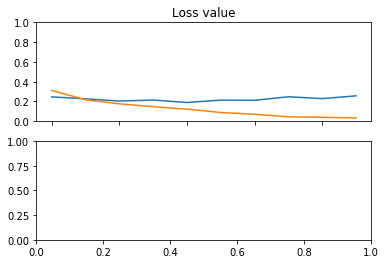

In [33]:
import pandas as pd

records     = pd.read_csv('./Models/'+modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'])
plt.plot(records['loss'])
plt.yticks([0,0.20,0.40,0.60,0.80,1.00])
plt.title('Loss value',fontsize=12)

ax          = plt.gca()
ax.set_xticklabels([])



plt.subplot(212)
plt.plot(records['val_acc'])
plt.plot(records['acc'])
plt.yticks([0.6,0.7,0.8,0.9,1.0])
plt.title('Accuracy',fontsize=12)
plt.show()


In [ ]:
example = data[400] # get the tokens
print (df['article'][400])

# Print tokens as text
for w in example:
    x = inv_index.get(w)
    print(x,end = ' ')

In [ ]:
# Get prediction
pred = model.predict(example.reshape(1,100))

In [ ]:
# Output predicted category
df['category'][np.argmax(pred)]

# Hyperparameters Optimization

In [ ]:
with open('Models/decisionTree_best_model.pickle', 'wb') as output:
    pickle.dump(best_lrc, output)
    
with open('Models/decisionTree_best_model_details.pickle', 'wb') as output:
    pickle.dump(df_models_lrc, output)